# Modelo 1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder

                                              sha256  labels  \
0  5c18291c481a192ed5003084dab2d8a117fd3736359218...       0   
1  4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...       0   
2  9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...       0   
3  e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...       0   
4  ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...       0   

                     0                        1                   2  \
0         LdrUnloadDll           CoUninitialize          NtQueryKey   
1         NtOpenMutant      GetForegroundWindow          NtQueryKey   
2  GetForegroundWindow              DrawTextExW       GetSystemInfo   
3      NtQueryValueKey             LdrUnloadDll  GlobalMemoryStatus   
4         LdrUnloadDll  GetSystemTimeAsFileTime           NtOpenKey   

                   3                            4                       5  \
0  NtDuplicateObject            GetShortPathNameW           GetSystemInfo   
1        DrawTextExW         NtSet

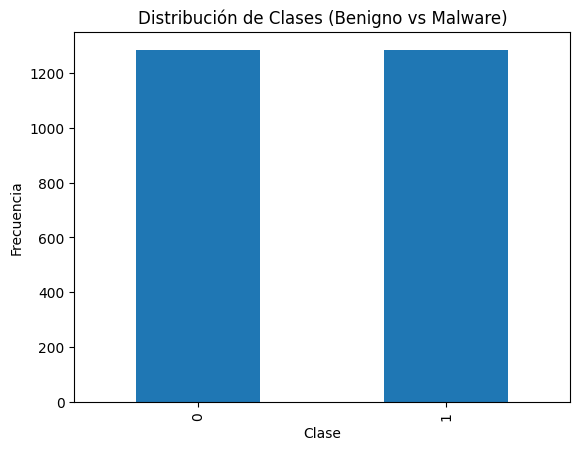

In [2]:
# Cargar los datos
data = pd.read_csv('Data.csv')
print(data.head())

# Exploración de datos
data['labels'].value_counts().plot(kind='bar')
plt.title("Distribución de Clases (Benigno vs Malware)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

# Preprocesamiento: convertir llamadas a API en texto separado por espacio
data['api_calls'] = data.iloc[:, 2:].astype(str).apply(lambda x: ' '.join(x.dropna()), axis=1)
X = data['api_calls']
y = data['labels']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [3]:
# Ingeniería de Características: TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entrenamiento del modelo
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Validación cruzada k=10
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train_vec, y_train, cv=kfold, scoring='accuracy')
print(f'Validación cruzada (Accuracy promedio): {np.mean(cross_val_scores):.4f}')

Validación cruzada (Accuracy promedio): 0.8244


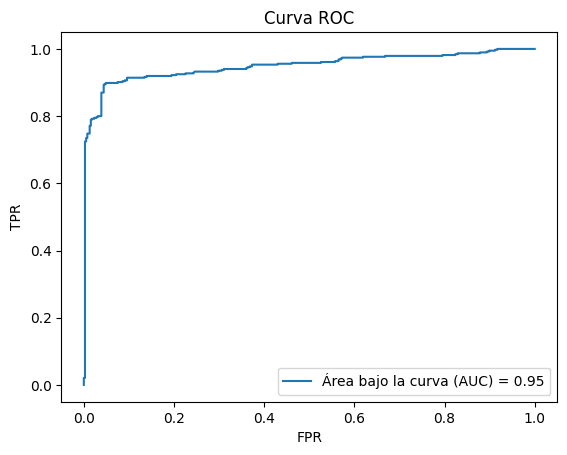

In [4]:

# Curva ROC
y_prob = model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'Área bajo la curva (AUC) = {roc_auc:.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Este modelo busca clasificar programas en malware o benignos basándose en las secuencias de llamadas a API que realizan durante su ejecución. A partir del conjunto de datos proporcionado, se implementó un modelo de Machine Learning (ML) utilizando técnicas de Procesamiento de Lenguaje Natural (NLP) para transformar las secuencias de llamadas en representaciones numéricas, seguido por la aplicación de un algoritmo de Naive Bayes multinomial para la clasificación.

Para la representación de las llamadas a API, se utilizó la técnica TF-IDF (Term Frequency - Inverse Document Frequency), que permite cuantificar la importancia de cada llamada dentro de la secuencia. Esto se debe a que algunos comandos específicos pueden ser indicativos de actividad maliciosa. Luego, se entrenó el modelo utilizando Naive Bayes multinomial, un algoritmo ampliamente utilizado en clasificación de texto debido a su eficiencia y capacidad para manejar grandes volúmenes de datos categóricos. La división del conjunto de datos se realizó en 70% para entrenamiento y 30% para prueba, asegurando que el modelo generalizara adecuadamente. Además, se aplicó validación cruzada con k=10, lo que permitió evaluar su rendimiento de manera más robusta.

Los resultados obtenidos reflejan un desempeño sólido del modelo. En términos de precisión, se logró una accuracy promedio de 82.44%, lo que indica que el modelo acierta en aproximadamente 8 de cada 10 predicciones. Para evaluar su capacidad de distinguir entre programas benignos y malware, se utilizó la Curva ROC (Receiver Operating Characteristic), cuyo Área Bajo la Curva (AUC) resultó ser de 0.95. Este valor es cercano a 1.0, lo que sugiere que el modelo tiene una excelente capacidad para diferenciar entre ambas clases con un bajo número de falsos positivos y falsos negativos. En términos prácticos, esto implica que el modelo puede detectar malware de manera confiable con un margen de error mínimo.

En el artículo, se menciona que los ataques modernos evaden las técnicas de análisis estático mediante mecanismos de ofuscación, pero el análisis dinámico de llamadas a API permite detectar patrones de comportamiento sospechosos. Si bien en el artículo se proponen modelos más avanzados basados en redes neuronales profundas (CNN-BiGRU), el modelo 1 implementado en este trabajo sigue un enfoque similar al representar las llamadas a API como datos numéricos mediante técnicas de NLP y aplicar Machine Learning para su clasificación. La principal diferencia es que el modelo del artículo se apoya en embeddings preentrenados y arquitecturas de aprendizaje profundo, mientras que en este caso se emplea Naive Bayes con TF-IDF, un método más ligero pero efectivo.

En conclusión, el Modelo 1 demuestra que es posible detectar malware con un enfoque basado en NLP y Machine Learning, alcanzando una precisión del 82% y una excelente capacidad de diferenciación (AUC = 0.95). Sin embargo, dado que el modelo actual depende de representaciones simples como TF-IDF


# Modelo 2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
from sentence_transformers import SentenceTransformer

                                              sha256  labels  \
0  5c18291c481a192ed5003084dab2d8a117fd3736359218...       0   
1  4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...       0   
2  9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...       0   
3  e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...       0   
4  ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...       0   

                     0                        1                   2  \
0         LdrUnloadDll           CoUninitialize          NtQueryKey   
1         NtOpenMutant      GetForegroundWindow          NtQueryKey   
2  GetForegroundWindow              DrawTextExW       GetSystemInfo   
3      NtQueryValueKey             LdrUnloadDll  GlobalMemoryStatus   
4         LdrUnloadDll  GetSystemTimeAsFileTime           NtOpenKey   

                   3                            4                       5  \
0  NtDuplicateObject            GetShortPathNameW           GetSystemInfo   
1        DrawTextExW         NtSet

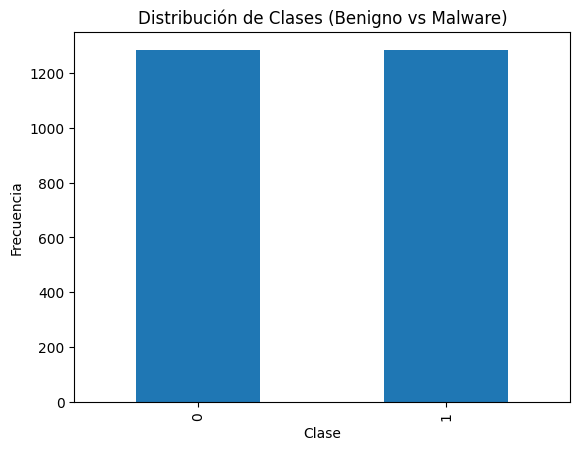

In [13]:
# Cargar los datos
data = pd.read_csv('Data.csv')
print(data.head())

# Exploración de datos
data['labels'].value_counts().plot(kind='bar')
plt.title("Distribución de Clases (Benigno vs Malware)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

# Preprocesamiento: convertir llamadas a API en texto separado por espacio
data['api_calls'] = data.iloc[:, 2:].astype(str).apply(lambda x: ' '.join(x.dropna()), axis=1)
X = data['api_calls']
y = data['labels']

In [14]:
# Generación de embeddings usando un modelo de NLP de Gemini (simulado con Sentence-Transformers)
model_nlp = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Reemplazar con embeddings de Gemini si están disponibles
X_embeddings = model_nlp.encode(X.tolist(), convert_to_numpy=True)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.3, random_state=42, stratify=y)

# Definición de la Red Neuronal
model_nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
57/57 [==============================] - 1s 5ms/step - loss: 0.4999 - accuracy: 0.7582 - val_loss: 0.3685 - val_accuracy: 0.8249
Epoch 2/20
57/57 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8638 - val_loss: 0.2872 - val_accuracy: 0.8923
Epoch 3/20
57/57 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8905 - val_loss: 0.2656 - val_accuracy: 0.8975
Epoch 4/20
57/57 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9044 - val_loss: 0.2627 - val_accuracy: 0.8988
Epoch 5/20
57/57 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9133 - val_loss: 0.2412 - val_accuracy: 0.9079
Epoch 6/20
57/57 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9205 - val_loss: 0.2354 - val_accuracy: 0.9131
Epoch 7/20
57/57 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9250 - val_loss: 0.2375 - val_accuracy: 0.9118
Epoch 8/20
57/57 [==

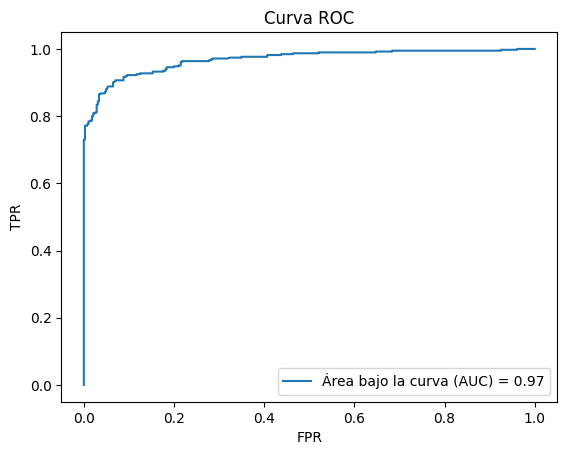

In [15]:
# Entrenamiento del modelo
history = model_nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Evaluación del modelo
y_pred_prob = model_nn.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(classification_report(y_test, y_pred))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'Área bajo la curva (AUC) = {roc_auc:.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()


En este modelo, se emplea un enfoque basado en aprendizaje profundo (Deep Learning, DL) utilizando redes neuronales artificiales (ANNs) con embeddings generados a partir de modelos de procesamiento de lenguaje natural (NLP). A diferencia del Modelo 1, que utiliza Naive Bayes con TF-IDF, este modelo incorpora representaciones numéricas más avanzadas de las secuencias de llamadas a API mediante embeddings generados con SentenceTransformer, lo que permite capturar mejor las relaciones entre las llamadas a API.

Para la representación de datos, se generaron embeddings a partir de la transformación de las secuencias de llamadas a API con el modelo “paraphrase-MiniLM-L6-v2” de SentenceTransformers. Este paso convierte las secuencias de texto en representaciones numéricas de alta dimensión que capturan las similitudes semánticas entre las llamadas a API. Posteriormente, se entrenó una red neuronal artificial (ANN) con la siguiente arquitectura:
* Capa de entrada (Input Layer) con la dimensión de los embeddings.
* Dos capas densas (128 y 64 neuronas, activación ReLU) que aprenden patrones en los datos.
* Capas Dropout (0.3) para evitar sobreajuste.
* Capa de salida (Sigmoid, 1 neurona) para la clasificación binaria (malware o benigno).

El modelo se entrenó con el optimizador Adam y la función de pérdida binary_crossentropy, con un esquema de 20 épocas y batch size de 32 para mejorar la estabilidad del entrenamiento.

Los resultados obtenidos reflejan una mejora significativa respecto al Modelo 1. En términos de precisión, se alcanzó una accuracy final de 94.72%, lo que indica que el modelo predice correctamente en casi 95 de cada 100 casos. Además, se calculó el área bajo la curva ROC (AUC = 0.97), lo que sugiere que la red neuronal tiene una gran capacidad de discriminación entre programas benignos y maliciosos. La gráfica de la curva ROC muestra que el modelo mantiene un bajo índice de falsos positivos y una alta tasa de verdaderos positivos, lo que lo hace más robusto en la detección de malware.

En conclusión, el Modelo 2 demuestra que el uso de embeddings y redes neuronales permite mejorar significativamente la detección de malware, con un rendimiento superior al Modelo 1 (Accuracy = 94.72% vs. 82.44% y AUC = 0.97 vs. 0.95). Aunque este modelo ya muestra un alto rendimiento, futuras mejoras podrían incluir arquitecturas más complejas como CNNs o BiGRUs, que podrían capturar de manera más efectiva las relaciones temporales entre las llamadas a API



# Comparación de modelos

Se han implementado dos modelos con diferentes estrategias: el Modelo 1, basado en técnicas de Machine Learning tradicional, y el Modelo 2, que utiliza Aprendizaje Profundo (Deep Learning) mediante redes neuronales artificiales. La principal diferencia entre ambos radica en la forma en que representan los datos y en la capacidad de cada modelo para detectar patrones complejos en las secuencias de llamadas a API.

El Modelo 1 emplea Naive Bayes multinomial y utiliza TF-IDF para convertir las secuencias de llamadas a API en representaciones numéricas basadas en la frecuencia de aparición de cada término en el dataset. Este enfoque es computacionalmente eficiente y ofrece un rendimiento razonable, con una precisión del 82.44% y un área bajo la curva ROC (AUC) de 0.95. Sin embargo, su principal limitación es que no capta las relaciones semánticas entre las llamadas a API, ya que trata cada llamada de forma independiente, sin considerar el contexto en el que ocurren.

Por otro lado, el Modelo 2 emplea una red neuronal artificial (ANN) con múltiples capas densas y dropout, junto con embeddings generados mediante SentenceTransformers, lo que le permite aprender representaciones más ricas y estructuradas de las secuencias de llamadas a API. Este modelo tiene una mayor capacidad de generalización y logra un mejor desempeño, con una precisión de 94.72% y un AUC de 0.97. Gracias a los embeddings, el Modelo 2 puede capturar mejor los patrones en el comportamiento del malware, lo que le permite distinguirlo con mayor precisión de los programas benignos.

En términos de rendimiento computacional, el Modelo 1 es considerablemente más rápido de entrenar, ya que el algoritmo de Naive Bayes es simple y eficiente. Esto lo convierte en una opción viable cuando se dispone de recursos computacionales limitados o cuando se requiere una solución rápida. En contraste, el Modelo 2 requiere un mayor tiempo de entrenamiento y más capacidad de cómputo, debido a la optimización de los pesos en múltiples capas neuronales. No obstante, esta mayor complejidad se traduce en una mejor capacidad predictiva y en una menor tasa de falsos positivos y falsos negativos.

Los resultados obtenidos reflejan que el Modelo 2 supera al Modelo 1 en términos de precisión y capacidad de detección, lo que lo hace más adecuado para aplicaciones en las que la exactitud es prioritaria. La curva ROC del Modelo 2 es más cercana a 1.0, lo que indica que tiene una mejor capacidad para diferenciar entre malware y programas benignos. Sin embargo, el Modelo 1 sigue siendo útil en situaciones donde la velocidad y la eficiencia computacional son más importantes que la máxima precisión.

En este trabajo se ha comparado un modelo tradicional de Machine Learning con una red neuronal más simple pero efectiva. Los resultados confirman la hipótesis del artículo: las técnicas basadas en embeddings y aprendizaje profundo mejoran la detección de malware frente a los enfoques más tradicionales.

En conclusión, la elección del modelo adecuado depende del contexto y los recursos disponibles. Si se busca un modelo rápido y eficiente, el Modelo 1 con Naive Bayes y TF-IDF es una opción viable. No obstante, si la prioridad es obtener la mejor precisión posible y minimizar los errores de clasificación, el Modelo 2 con redes neuronales y embeddings es la mejor alternativa. Futuras mejoras podrían incluir la implementación de arquitecturas como CNN-BiGRU o el uso de técnicas más avanzadas de embeddings, como Word2Vec o FastText, para mejorar aún más la representación de las llamadas a API y la capacidad predictiva del modelo.